# Zero-D Reactor Model 

To model a gas tank being filled, we consider a 0-D (lumped parameter) approach where pressure $P(t)$, temperature $T(t)$, and inlet velocity $v_{\text{in}}(t)$ evolve over time. Below is the derivation and key equations. 

## Import Julia Packages 

In [1]:
using DifferentialEquations
using Plots

## Introduction 

### Governing Equations
1. *Mass Conservation*  
   Rate of mass change in the tank equals the incoming mass flow rate $\dot{m}_{\text{in}}$:  
   $$
   \frac{dm}{dt} = \dot{m}_{\text{in}}
   $$

2. *Energy Conservation*  
   Rate of internal energy change equals enthalpy inflow:  
   $$
   \frac{d}{dt}(m c_v T) = \dot{m}_{\text{in}} c_p T_0
   $$
   Expanding and substituting \( \frac{dm}{dt} = \dot{m}_{\text{in}} \):  
   $$
   \frac{dT}{dt} = \frac{\dot{m}_{\text{in}}}{m c_v} \left( c_p T_0 - c_v T \right)
   $$

3. *Ideal Gas Law*  
   Relates pressure, mass, and temperature:  
   $$
   P(t) = \frac{m(t) R T(t)}{V}
   $$
   where \( R = c_p - c_v \).
   
### Mass Flow Rate $ \dot{m}_{\text{in}}$ 
Assume gas flows from a supply at \( P_0, T_0 \). The flow is *choked* if \( P(t) \leq P_{\text{crit}} \), else *subsonic*:  
- *Critical Pressure*:  
  $$
  P_{\text{crit}} = P_0 \left( \frac{2}{\gamma + 1} \right)^{\frac{\gamma}{\gamma - 1}}
  $$
- *Subsonic Flow* (\( P(t) > P_{\text{crit}} \)):  
  $$
  \dot{m}_{\text{in}} = C_d A \frac{P_0}{\sqrt{T_0}} \sqrt{\frac{\gamma}{R}} \left( \frac{P}{P_0} \right)^{\frac{1}{\gamma}} \sqrt{\frac{2}{\gamma - 1} \left( 1 - \left( \frac{P}{P_0} \right)^{\frac{\gamma - 1}{\gamma}} \right)}
   $$
- *Choked Flow* (\( P(t) \leq P_{\text{crit}} \)):  
  $$
  \dot{m}_{\text{in}} = C_d A \frac{P_0}{\sqrt{T_0}} \sqrt{\frac{\gamma}{R}} \left( \frac{2}{\gamma + 1} \right)^{\frac{\gamma + 1}{2(\gamma - 1)}}
  $$

### Inlet Velocity $v_{\text{in}}(t)$
- *Subsonic*:  
  $$
  v_{\text{in}} = \sqrt{\frac{2 \gamma}{\gamma - 1} R T_0 \left( 1 - \left( \frac{P(t)}{P_0} \right)^{\frac{\gamma - 1}{\gamma}} \right)}
  $$
- *Choked*:  
  $$
  v_{\text{in}} = \sqrt{\gamma R T_0} \quad \text{(speed of sound at } T_0 \text{)}
  $$

### Solution Procedure
1. *Initial Conditions*:  
   \( m(0) = \frac{P_{\text{initial}} V}{R T_{\text{initial}}} \), \( T(0) = T_{\text{initial}} \).

2. *Numerical Integration*:  
   Solve the coupled ODEs for \( m(t) \) and \( T(t) \) using methods like Euler or Runge-Kutta:
   $$
   \frac{dm}{dt} = \dot{m}{\text{in}}(P(t)), \quad \frac{dT}{dt} = \frac{\dot{m}{\text{in}}(P(t))}{m(t) c_v} \left( c_p T_0 - c_v T(t) \right)
   $$
   Compute \( P(t) \) from the ideal gas law at each step.

3. *Velocity Calculation*:  
   Use \( v_{\text{in}}(t) \) based on \( P(t)/P_0 \).

### Key Parameters
- \( \gamma = \frac{c_p}{c_v} \): Specific heat ratio.
- \( C_d \): Discharge coefficient.
- \( A \): Inlet area.
- \( V \): Tank volume.

### Example Output
- *Pressure*: Increases as mass accumulates.
- *Temperature*: Depends on enthalpy inflow and tank heat capacity.
- *Velocity*: Decreases as tank pressure approaches supply pressure (subsonic) or remains constant (choked).

This system requires numerical implementation (e.g., Python, MATLAB) to solve the ODEs and compute results over time.

## Section 1: First Model 

p < Pt_in
p = 105361.98361015467, p_crit = 105320.65855981903, Pt_in = 200000.0
p < Pt_in
p = 105600.37573729029, p_crit = 105320.65855981903, Pt_in = 200000.0
p < Pt_in
p = 105838.46742152442, p_crit = 105320.65855981903, Pt_in = 200000.0
p < Pt_in
p = 106076.25866261782, p_crit = 105320.65855981903, Pt_in = 200000.0
p < Pt_in
p = 106313.74946033071, p_crit = 105320.65855981903, Pt_in = 200000.0
p < Pt_in
p = 106550.93981442267, p_crit = 105320.65855981903, Pt_in = 200000.0
p < Pt_in
p = 106787.8297246527, p_crit = 105320.65855981903, Pt_in = 200000.0
p < Pt_in
p = 107024.41919077914, p_crit = 105320.65855981903, Pt_in = 200000.0
p < Pt_in
p = 107260.70821255975, p_crit = 105320.65855981903, Pt_in = 200000.0
p < Pt_in
p = 107496.69678975163, p_crit = 105320.65855981903, Pt_in = 200000.0
p < Pt_in
p = 107732.38492211128, p_crit = 105320.65855981903, Pt_in = 200000.0
p < Pt_in
p = 107967.77260939461, p_crit = 105320.65855981903, Pt_in = 200000.0
p < Pt_in
p = 108202.85985135692, p_crit 

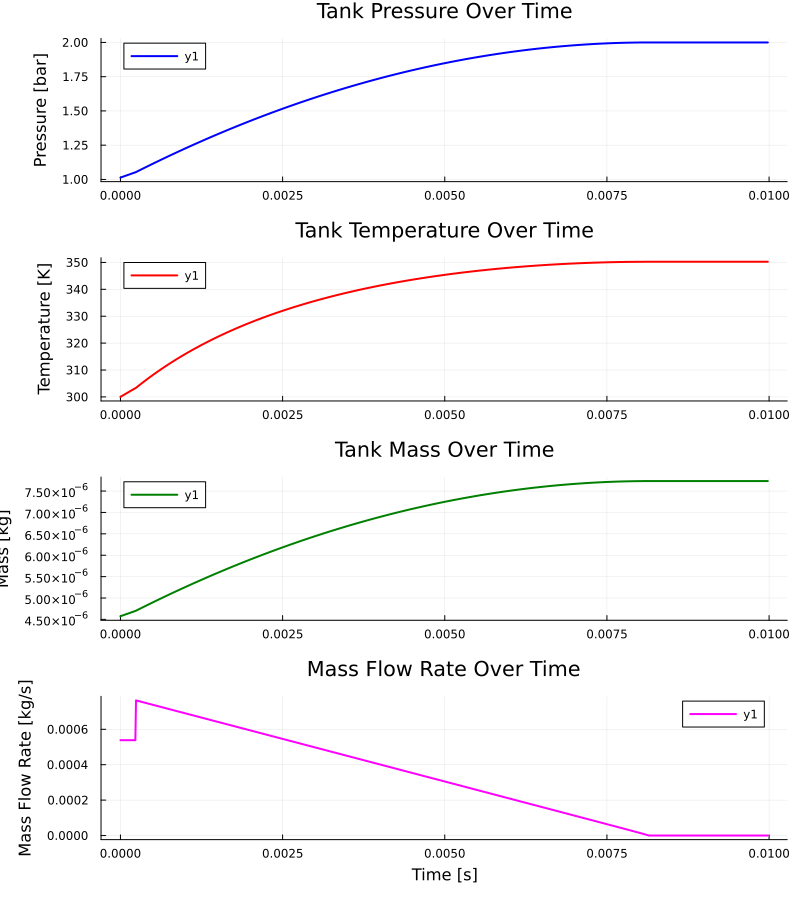

In [2]:
# Zero‑Dimensional Gas Tank Filling Model (Hydrogen)

# Physical Constants
R     = 4124       # J/(kg·K) - Specific gas constant for H2
γ     = 1.41       # Specific heat ratio for H2
L     = 0.80       # m - Tank length
Rt    = 0.04       # m - Tank radius
Ri    = 0.01       # m - Inlet pipe radius
s     = 5          # deg - Angular sector
t_end = 0.01       # s - Total simulation time
nt    = 1000       # Number of time divisions

# Derived quantities
A     = (s/360) * π * Ri^2           # Inlet area (sector)
A360  = π * Ri^2                     # Full inlet area
V     = (s/360) * π * Rt^2 * L       # Tank volume [m^3]
dt    = t_end / nt                   # Time step [s]

# User Inputs
Pt_in  = 2e5         # Inlet total pressure [Pa]
Tt_in  = 300         # Inlet total temperature [K]
Cd     = 1           # Discharge coefficient
IsGas  = false       # false = incompressible (Torricelli)
IsCoff = true        # Cutoff switch for mdot

# Initial Conditions
p      = 101325                         # Pressure [Pa]
T      = 300                            # Temperature [K]
m      = p * V / (R * T)                # Initial mass [kg]
ρt     = Pt_in / (R * Tt_in)            # Inlet density [kg/m^3]
ρs     = p / (R * T)                    # Initial tank density
mdot   = 1.0                            # Initial mdot guess

# Preallocate storage
n        = Int(floor(t_end / dt))
time     = zeros(n)
P        = zeros(n)
Tvec     = zeros(n)
M        = zeros(n)
mdot_vec = zeros(n)

# Simulation loop
reached = false

for i in 1:n
    # Store current state
    time[i]     = (i - 1) * dt
    P[i]        = p
    Tvec[i]     = T
    M[i]        = m

    # Critical pressure for choked flow
    p_crit = Pt_in * (2 / (γ + 1))^(γ / (γ - 1))

    if p < p_crit
        # Choked flow
        mdot = Cd * A * Pt_in * sqrt(γ / (R * Tt_in)) *
               (2 / (γ + 1))^((γ + 1) / (2 * (γ - 1)))
    elseif p < Pt_in
        # Subsonic flow
        if !IsGas
            mdot = Cd * A * sqrt(2 * ρt * (Pt_in - p))
            println("p < Pt_in")
            println("p = $p, p_crit = $p_crit, Pt_in = $Pt_in")
        else
            ratio = p / Pt_in
            mdot = Cd * A * Pt_in * sqrt(γ / (R * Tt_in)) *
                   ratio^(1 / γ) *
                   sqrt((2 / (γ - 1)) * (1 - ratio^((γ - 1) / γ)))
        end
    else
        # Tank pressure has reached inlet pressure
        mdot *= 1 - Int(IsCoff)
    end
    mdot_vec[i] = mdot

    # Energy update
    U = m * R * T / (γ - 1)
    U += mdot * dt * γ * R * Tt_in / (γ - 1)

    # Update state variables
    m += mdot * dt
    T = (γ - 1) * U / (m * R)
    p = m * R * T / V

    # Check for crossover
    if !reached && mdot_vec[i] <= 0
        reached = true
        p_reach = p
        t_reach = time[i]
        mfr_reach = mdot_vec[i]
        mfr_0 = mdot_vec[1]
        v_0 = mfr_0 / (ρs * A360)

        println("Initial Inlet mass flow rate = $(mfr_0) kg/s at t = 0 s")
        println("Initial Inlet velocity = $(v_0) m/s at t = 0 s")
        println("-------------------------")
        println("Tank pressure p = $(round(p_reach)) Pa reached Pt_in = $(round(Pt_in)) Pa at t = $(t_reach) s")
        println("Final Inlet mass flow rate = $(mdot_vec[i]) kg/s at t = $(t_reach) s")
        # Optionally: break
    end
end

# Plotting
plot_layout = @layout [a; b; c; d]
p1 = plot(time, P ./ 1e5, lw=2, color=:blue, ylabel="Pressure [bar]", title="Tank Pressure Over Time", grid=true)
p2 = plot(time, Tvec, lw=2, color=:red, ylabel="Temperature [K]", title="Tank Temperature Over Time", grid=true)
p3 = plot(time, M, lw=2, color=:green, ylabel="Mass [kg]", title="Tank Mass Over Time", grid=true)
p4 = plot(time, mdot_vec, lw=2, color=:magenta, ylabel="Mass Flow Rate [kg/s]", xlabel="Time [s]", title="Mass Flow Rate Over Time", grid=true)
plot(p1, p2, p3, p4, layout=plot_layout, size=(800, 900))